## Introduction
The Franz Butler Vineyard (TM) would like to predict how much they can charge for a bottle of wine from their vineyard. The local market has three main price points: Boxed, Good, and Fancy. They would first like to compare various categorical Machine Learning models to decide the most accurate model for predicting the quality of a wine, based on 11 testable features.

In [14]:
# Run for required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix #accuracy metrics for each classification
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

## Dataset Description
Our dataset consists of quantitative descriptions of various wines. There are 1599 wines sampled. We have 11 features for each observation, each with a numeric rating of a physiochemical property of the wine such as alcohol content and acidity. The output variable we seek to predict corresponds to the quality rating of each wine, from sensory data. There are no missing values. 

A closer inspection of the quality outputs shows a total of 6 integer categories (3-6). However there is also a clear partition, based on the distibution, into 3 subcategories (3-4, 5-6, 7-8). This leads to the hypothesis that we can look at predicting if a wine is of quality Box, Good, or Fancy using these subcategories.

In [4]:
#Read in data
filename = "./winequality-red.csv"
df = pd.read_csv(filename, delimiter = ';')
X = df.values[:,0:-1]
y = df.values[:,-1]

#Normalize Feature Data
X = preprocessing.normalize(X)

#Print dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[2. 2. 2. ... 2. 2. 2.]


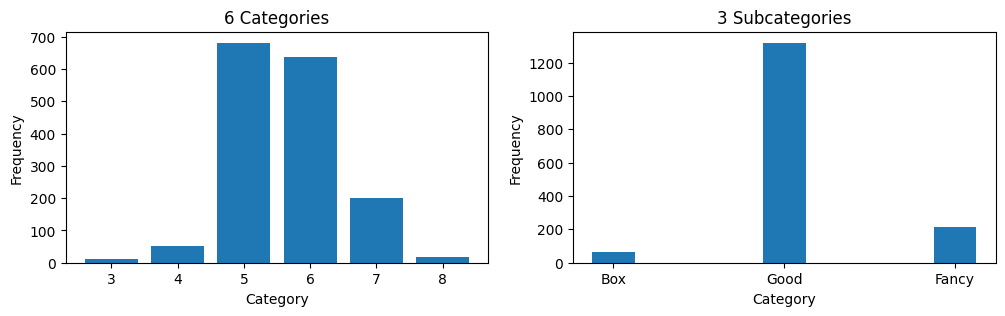

In [43]:

# Create subcategories for y data and count frequency
y_threecat = (y - 1) // 2 # if 3-4 then 1-Box, if 5-6 then 2-Good, if 7-8 then 3-Fancy
names_threecat = ["Box", "Good", "Fancy"]
print(y_threecat)
d = collections.Counter(y)
d_threecat = collections.Counter(y_threecat)

# Plot 
fig = plt.figure(figsize=(12,3))
plt.subplot(121)
plt.bar(d.keys(), d.values())
plt.title("6 Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
ax = plt.subplot(122)
plt.bar(d_threecat.keys(), d_threecat.values(), width=.25)
plt.title("3 Subcategories")
plt.xlabel("Category")
plt.ylabel("Frequency")
ax.set_xticks([1,2,3], names_threecat)


## Experimental Setup 

TODO

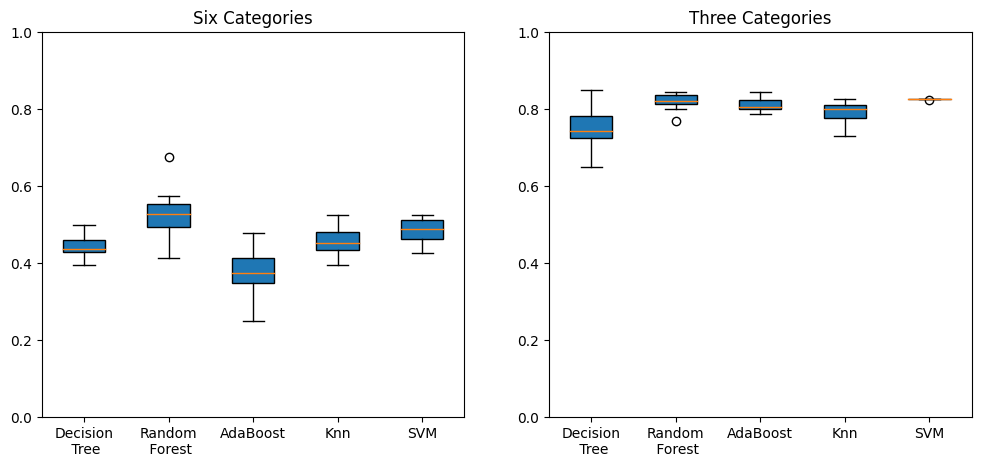

In [45]:
# ML Estimators to test
names = ["Decision\n Tree",
         "Random\n Forest",
         "AdaBoost",
         "Knn",
         "SVM"
         ]
estimators = [tree.DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              SVC()
              ]

num_kfolds = 10

# Split data (if needed)
X_train = X
y_train = y
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 101)

# Try 3 category approach
y_train_threecat = y_threecat
#y_test_threecat = (y_test - 1) // 2

# Initilize storge for accuaccy measure
num_est = len(estimators)
acc = np.zeros([num_est, num_kfolds])
acc_threecat = np.zeros([num_est, num_kfolds])

# Run CV for each estimator and gather accuracy scores
for name, est in zip(names, estimators):
    acc[estimators.index(est), :] = cross_val_score(est, X_train, y_train, cv=num_kfolds)
    acc_threecat[estimators.index(est), :] = cross_val_score(est, X_train, y_train_threecat, cv=num_kfolds)

# Plot results
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.boxplot(acc.T, patch_artist=True, labels=names)
plt.ylim([0,1])
plt.title("Six Categories")
plt.subplot(122)
plt.boxplot(acc_threecat.T, patch_artist=True, labels=names)
plt.ylim([0,1])
plt.title("Three Categories")
plt.show()

## Results
For the 6 original categories, a Random Forest model has the highest accuracy of roughly 50%. By decreasing the output to 3 subcategories, we see a significant increase in accuracy with a jump of around 30%. Although the Support Vector Machine performed slightly better, a Random Forest model still has a comparable accuracy. In conclusion, we recommend the Franz Butler Vineyard pursue a Random Forest to determine the pricing point of future wine production.

## Resources Used
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

## DELETE BELOW?

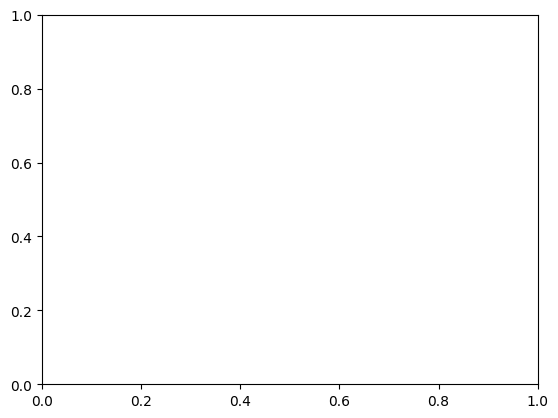

In [ ]:
# ML Estimators to test
names = ["SVM",
         "Random Forest",
         "AdaBoost",
         "Knn"
         ]
estimators = [SVC(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              ]

num_est = len(estimators)
num_outer_splits = 3
num_inner_splits = 2
# Cost metrics to compare
mse = []
acc = np.zeros([num_est, num_outer_splits*num_inner_splits])
mse_threecat = []
acc_threecat = []

# Outer CV
kf = KFold(n_splits=num_outer_splits)
for out, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = df.values[train_index, 0:-1]
    y_train = df.values[train_index, -1]
    temp = zeros(num_est, num_inner_splits)
    # Run CV on each estimator
    for name, est in zip(names, estimators):
        #print(names.index(name))
        temp[estimators.index(est), :] = cross_val_score(est, X_train, y_train, cv=num_inner_splits)
        #est.fit(X_train, y_train)
        #y_pred = est.predict(X_test)
        #mse.append(mean_squared_error(y_pred, y_test))
        #acc.append(accuracy_score(y_pred, y_test))
    acc = acc + temp

# Average of outer CV
#avg_acc = np.average(acc, axis=0)
#print(avg_acc)
# Run each estimator and evaluate cost metric for 3 condensed categories
#for name, est in zip(names, estimators):
 #   est.fit(X_train, y_train_threecat)
  #  y_pred_threecat = est.predict(X_test)
  #  mse_threecat.append(mean_squared_error(y_pred_threecat, y_test_threecat))
  #  acc_threecat.append(accuracy_score(y_pred_threecat, y_test_threecat))

# Plot results
fig = plt.figure()
data = 
boxplot
#ax1 = fig.add_subplot(111)
#ax1.scatter(names, mse, c='b', marker='o', label='Mean Squared Error 6 Categories')
#ax1.scatter(names, avg_acc, c='m', marker='o', label='Accuracy 6 Categores')
#ax1.scatter(names, mse_threecat, c='b', marker='s', label='Mean Squared Error 3 Categories')
#ax1.scatter(names, acc_threecat, c='m', marker='s', label='Accuracy 3 Categories')
#plt.legend(loc='best')
#plt.show()

## Results
TODO 